In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [7]:
x=df['YearsExperience']


In [8]:
y=df['Salary']

In [9]:
x=df['YearsExperience'].values.reshape(-1,1)


In [10]:
x.shape

(30, 1)

In [11]:
y.shape

(30,)

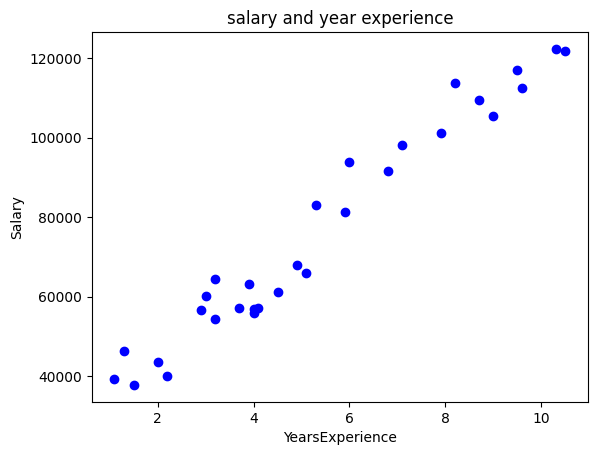

In [12]:
plt.scatter(x,y,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('salary and year experience')
plt.show()

Split the data in training data and testing data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
linearRegression=LinearRegression()
linearRegression.fit(x_train,y_train)


LinearRegression()

In [14]:
print('m',linearRegression.coef_[0])
print('c',linearRegression.intercept_)

m 9339.081723815198
c 25918.438334893202


In [15]:
y_pred=linearRegression.predict(x_test)
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

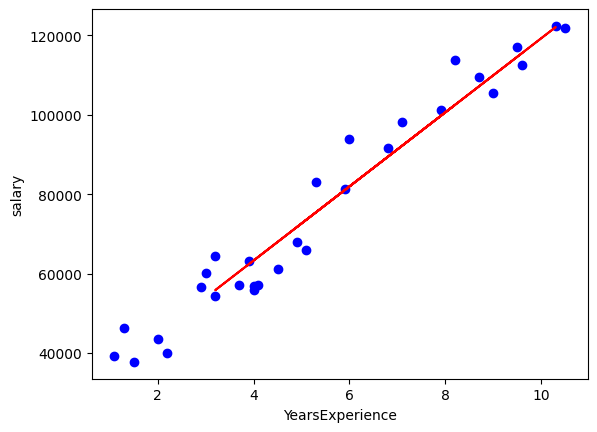

In [16]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.show()

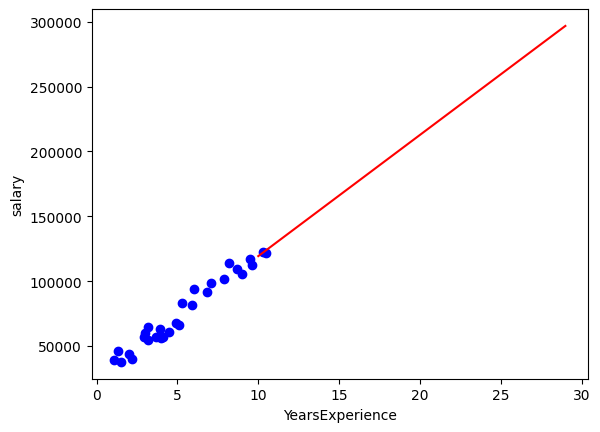

In [17]:
x_future=np.array(range(10,30)).reshape(-1,1)

y_future=linearRegression.predict(x_future)
plt.scatter(x,y,color='blue')
plt.plot(x_future,y_future,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.show()

predict the future salry of year experience is 25

In [18]:
x_future=np.array((25)).reshape(-1,1)
y_future=linearRegression.predict(x_future)
y_future

array([63274.76523015])

model can be dump using pickle library

In [21]:
import pickle
pickle.dump(linearRegression,open('linear_reg.pkl',"wb"))
model=pickle.load(open("linear_reg.pkl","rb"))
model.predict([[25]])

array([259395.48143027])